# Hyperparameter Tuning and Pruning in Decision Trees - Lab

## Introduction

In this lab, you will use the titanic dataset to see the impact of tree pruning and hyperparameter tuning on the predictive performance of a decision tree classifier. Pruning reduces the size of decision trees by removing nodes of the tree that do not provide much predictive power to classify instances. Decision trees are the most susceptible out of all the machine learning algorithms to overfitting and effective pruning can reduce this likelihood. 

## Objectives

In this lab you will: 

- Determine the optimal hyperparameters for a decision tree model and evaluate the model performance

## Import necessary libraries

Let's first import the libraries you'll need for this lab. 

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
#plt.style.use('seaborn-v0_8-darkgrid')

## Import the data

The titanic dataset, available in `'titanic.csv'`, is all cleaned up and preprocessed for you so that you can focus on pruning and optimization. Import the dataset and print the first five rows of the data: 

In [3]:
# Import the data
df = pd.read_csv('titanic.csv')

df.head()

,PassengerId,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Survived
0,1,22.0,1,0,7.2500,0,0,1,0,1,0,0,1,0
1,2,38.0,1,0,71.2833,1,0,0,1,0,1,0,0,1
2,3,26.0,0,0,7.9250,0,0,1,1,0,0,0,1,1
3,4,35.0,1,0,53.1000,1,0,0,1,0,0,0,1,1
4,5,35.0,0,0,8.0500,0,0,1,0,1,0,0,1,0


## Create training and test sets

- Assign the `'Survived'` column to `y` 
- Drop the `'Survived'` and `'PassengerId'` columns from `df`, and assign the resulting DataFrame to `X` 
- Split `X` and `y` into training and test sets. Assign 30% to the test set and set the `random_state` to `SEED` 

In [4]:
# Create X and y 
y = df['Survived']
X = df.drop(columns=['Survived', 'PassengerId'], axis=1)

# Split into training and test sets
SEED = 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=SEED)

## Train a vanilla classifier

__Note:__ The term "vanilla" is used for a machine learning algorithm with its default settings (no tweaking/tuning).

- Instantiate a decision tree 
  - Use the `'entropy'` criterion and set the `random_state` to `SEED` 
- Fit this classifier to the training data 

In [5]:
# Train the classifier using training data
dt = DecisionTreeClassifier(criterion='entropy', random_state=SEED )
dt.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', random_state=1)

## Make predictions 
- Create a set of predictions using the test set 
- Using `y_test` and `y_pred`, calculate the AUC (Area under the curve) to check the predictive performance

In [6]:
# Make predictions using test set 
y_pred = dt.predict(X_test)

# Check the AUC of predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7367718101733446

## Maximum Tree Depth

Let's first check for the best depth parameter for our decision tree: 

- Create an array for `max_depth` values ranging from 1 - 32  
- In a loop, train the classifier for each depth value (32 runs) 
- Calculate the training and test AUC for each run 
- Plot a graph to show under/overfitting and the optimal value 
- Interpret the results 

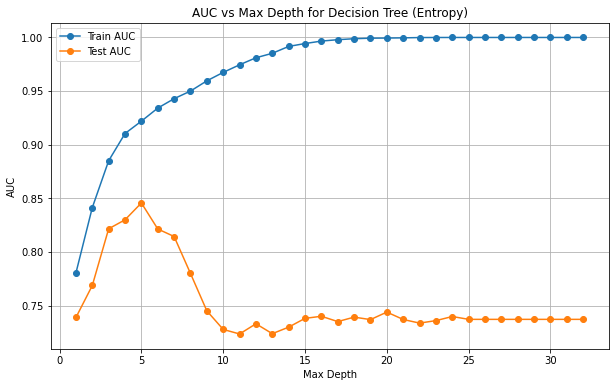

In [8]:
# Identify the optimal tree depth for given data
# Create an array for `max_depth` values ranging from 1 to 32
max_depth_values = np.arange(1, 33)
train_auc = []
test_auc = []

# SEED for reproducibility
SEED = 42

# Train the classifier for each depth value and calculate AUC
for depth in max_depth_values:
    dt = DecisionTreeClassifier(criterion='entropy', random_state=SEED, max_depth=depth)
    dt.fit(X_train, y_train)
    
    # Make predictions using test set probabilities
    y_train_pred_prob = dt.predict_proba(X_train)[:, 1]  # Get the probabilities for the positive class
    y_test_pred_prob = dt.predict_proba(X_test)[:, 1]
    
    # Calculate AUC for training and test datasets
    train_auc.append(auc(*roc_curve(y_train, y_train_pred_prob)[:2]))
    test_auc.append(auc(*roc_curve(y_test, y_test_pred_prob)[:2]))

# Plotting the graph to show under/overfitting
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, train_auc, label='Train AUC', marker='o')
plt.plot(max_depth_values, test_auc, label='Test AUC', marker='o')
plt.xlabel('Max Depth')
plt.ylabel('AUC')
plt.title('AUC vs Max Depth for Decision Tree (Entropy)')
plt.legend()
plt.grid(True)
plt.show()



In [ ]:
# Your observations here 
"""
From the graph above, for the training AUC as the depth increases so does the accuracy unlike for the testing AUC whereby 
we see as the maximum depth increases the accuracy decreases showing that the model is overfitting on the training model.
This means the model cannot work new or unseen data.
"""

## Minimum Sample Split

Now check for the best `min_samples_splits` parameter for our decision tree 

- Create an array for `min_sample_splits` values ranging from 0.1 - 1 with an increment of 0.1 
- In a loop, train the classifier for each `min_samples_splits` value (10 runs) 
- Calculate the training and test AUC for each run 
- Plot a graph to show under/overfitting and the optimal value 
- Interpret the results

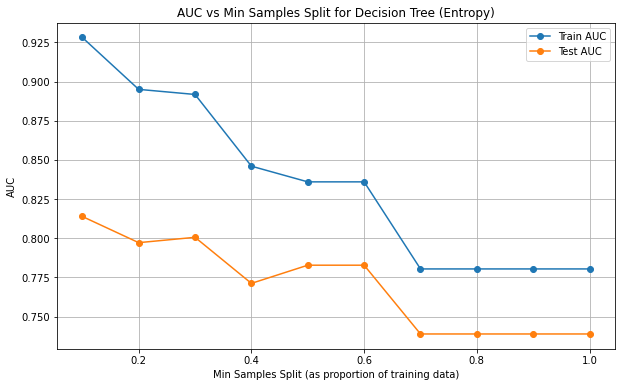

In [9]:
# Create an array for `min_samples_split` values ranging from 0.1 to 1 with an increment of 0.1
min_samples_splits = np.arange(0.1, 1.1, 0.1)
train_auc = []
test_auc = []

# SEED for reproducibility
SEED = 42

# Train the classifier for each `min_samples_split` value and calculate AUC
for split in min_samples_splits:
    # Convert float to an integer value representing the minimum number of samples
    min_samples_split = int(split * X_train.shape[0])
    
    dt = DecisionTreeClassifier(criterion='entropy', random_state=SEED, min_samples_split=min_samples_split)
    dt.fit(X_train, y_train)
    
    # Make predictions using test set probabilities
    y_train_pred_prob = dt.predict_proba(X_train)[:, 1]  # Get the probabilities for the positive class
    y_test_pred_prob = dt.predict_proba(X_test)[:, 1]
    
    # Calculate AUC for training and test datasets
    train_auc.append(auc(*roc_curve(y_train, y_train_pred_prob)[:2]))
    test_auc.append(auc(*roc_curve(y_test, y_test_pred_prob)[:2]))

# Plotting the graph to show under/overfitting
plt.figure(figsize=(10, 6))
plt.plot(min_samples_splits, train_auc, label='Train AUC', marker='o')
plt.plot(min_samples_splits, test_auc, label='Test AUC', marker='o')
plt.xlabel('Min Samples Split (as proportion of training data)')
plt.ylabel('AUC')
plt.title('AUC vs Min Samples Split for Decision Tree (Entropy)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Your observations here
"""
the training and test accuracy stabilize at a certain minimum sample split size, and stays the same even if we carry on increasing the size of the split. 
This means that we will have a complex model, with similar accuracy than a much simpler model could potentially exhibit. 
"""

## Minimum Sample Leafs

Now check for the best `min_samples_leafs` parameter value for our decision tree 

- Create an array for `min_samples_leafs` values ranging from 0.1 - 0.5 with an increment of 0.1 
- In a loop, train the classifier for each `min_samples_leafs` value (5 runs) 
- Calculate the training and test AUC for each run 
- Plot a graph to show under/overfitting and the optimal value 
- Interpret the results

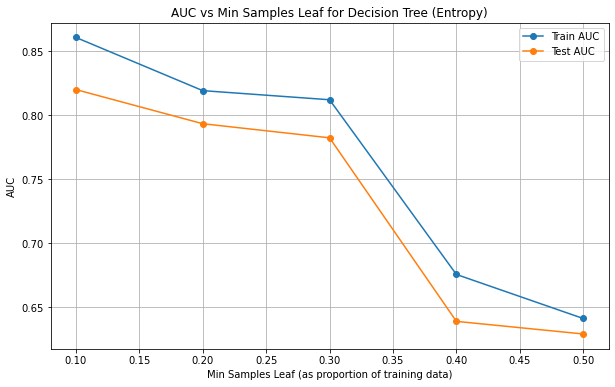

In [10]:
# Create an array for `min_samples_leaf` values ranging from 0.1 to 0.5 with an increment of 0.1
min_samples_leafs = np.arange(0.1, 0.6, 0.1)
train_auc = []
test_auc = []

# SEED for reproducibility
SEED = 42

# Train the classifier for each `min_samples_leaf` value and calculate AUC
for leaf in min_samples_leafs:
    # Convert float to an integer value representing the minimum number of samples per leaf
    min_samples_leaf = int(leaf * X_train.shape[0])
    
    dt = DecisionTreeClassifier(criterion='entropy', random_state=SEED, min_samples_leaf=min_samples_leaf)
    dt.fit(X_train, y_train)
    
    # Make predictions using test set probabilities
    y_train_pred_prob = dt.predict_proba(X_train)[:, 1]  # Get the probabilities for the positive class
    y_test_pred_prob = dt.predict_proba(X_test)[:, 1]
    
    # Calculate AUC for training and test datasets
    train_auc.append(auc(*roc_curve(y_train, y_train_pred_prob)[:2]))
    test_auc.append(auc(*roc_curve(y_test, y_test_pred_prob)[:2]))

# Plotting the graph to show under/overfitting
plt.figure(figsize=(10, 6))
plt.plot(min_samples_leafs, train_auc, label='Train AUC', marker='o')
plt.plot(min_samples_leafs, test_auc, label='Test AUC', marker='o')
plt.xlabel('Min Samples Leaf (as proportion of training data)')
plt.ylabel('AUC')
plt.title('AUC vs Min Samples Leaf for Decision Tree (Entropy)')
plt.legend()
plt.grid(True)
plt.show()






In [ ]:
# Your observations here 
"""
The above plot shows the impact of this parameter on the accuracy of the classifier. 
We see that increasing this parameter value after an optimal point reduces accuracy. 
That is due to underfitting again, as keeping too many samples in our leaf nodes means that there is still a high level of uncertainty in the data.
"""


## Maximum Features

Now check for the best `max_features` parameter value for our decision tree 

- Create an array for `max_features` values ranging from 1 - 12 (1 feature vs all)
- In a loop, train the classifier for each `max_features` value (12 runs) 
- Calculate the training and test AUC for each run 
- Plot a graph to show under/overfitting and the optimal value 
- Interpret the results

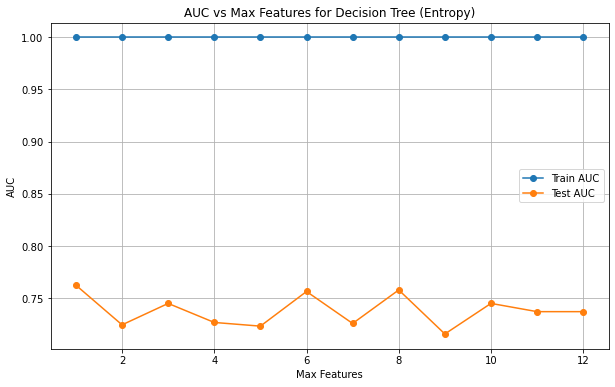

In [11]:
# Create an array for `max_features` values ranging from 1 to 12 (1 feature vs all)
max_features_values = np.arange(1, 13)
train_auc = []
test_auc = []

# SEED for reproducibility
SEED = 42

# Train the classifier for each `max_features` value and calculate AUC
for features in max_features_values:
    dt = DecisionTreeClassifier(criterion='entropy', random_state=SEED, max_features=features)
    dt.fit(X_train, y_train)
    
    # Make predictions using test set probabilities
    y_train_pred_prob = dt.predict_proba(X_train)[:, 1]  # Get the probabilities for the positive class
    y_test_pred_prob = dt.predict_proba(X_test)[:, 1]
    
    # Calculate AUC for training and test datasets
    train_auc.append(auc(*roc_curve(y_train, y_train_pred_prob)[:2]))
    test_auc.append(auc(*roc_curve(y_test, y_test_pred_prob)[:2]))

# Plotting the graph to show under/overfitting
plt.figure(figsize=(10, 6))
plt.plot(max_features_values, train_auc, label='Train AUC', marker='o')
plt.plot(max_features_values, test_auc, label='Test AUC', marker='o')
plt.xlabel('Max Features')
plt.ylabel('AUC')
plt.title('AUC vs Max Features for Decision Tree (Entropy)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Your observations here
"""
From the graph we see that the training model is overfitting because of the number of features used.
The accuracy of the testing model decreases because of the number of features used in the training model since the training 
model is overfitting.
"""

## Re-train the classifier with chosen values

Now we will use the best values from each training phase above and feed it back to our classifier. Then we can see if there is any improvement in predictive performance. 

- Train the classifier with the optimal values identified 
- Compare the AUC of the new model with the earlier vanilla decision tree AUC 
- Interpret the results of the comparison

In [14]:
# Train a classifier with optimal values identified above
optimal_max_depth = 5  # Example value, replace with your actual optimal value
optimal_min_samples_split = int(0.3 * X_train.shape[0])  # Example value, replace with your actual optimal value
optimal_min_samples_leaf = int(0.2 * X_train.shape[0])  # Example value, replace with your actual optimal value
optimal_max_features = 8 

dt2 = DecisionTreeClassifier( criterion='entropy', 
    random_state=42, 
    max_depth=optimal_max_depth,
    min_samples_split=optimal_min_samples_split,
    min_samples_leaf=optimal_min_samples_leaf,
    max_features=optimal_max_features)
dt2.fit(X_train, y_train)

y_pred2 = dt2.predict(X_test)


false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred2)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7389599317988065

In [ ]:
# Your observations here

In order to address the issue of a baseline classifier performing better than a tuned one like this, a more-sophisticated technique is called a "grid search" and this will be introduced in a future lesson.

## Summary 

In this lesson, we looked at tuning a decision tree classifier in order to avoid overfitting and increasing the generalization capabilities of the classifier. For the titanic dataset, we see that identifying optimal parameter values can result in some improvements towards predictions. This idea will be exploited further in upcoming lessons and labs. 